In this file, I have implemented ANN from scratch! I have used all the formulas used for forward and back propagation.

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [33]:
data = pd.read_csv("/content/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [35]:
def init_params():
  # 784 inputs & 10 nodes in each hidden layer
  #for 784 inputs, we are passing each input to each 10 node in next hidden layer
  W1 = np.random.rand(10, 784) - 0.5
  #bias value for each 10 node
  b1 = np.random.rand(10, 1) - 0.5
  #for 10 inputs from the 1st hidden layer, we are passing each input to each 10 node in next hidden layer(output layer)
  W2 = np.random.rand(10, 10) - 0.5
  #bias value for each 10 node
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  # ReLU function return 0 if the x is <= 0 and return x otherwise
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  # output from first layer
  # Rectified Linear Unit
  A1 = ReLU(Z1)
  # feed thee output of first layer as input of second layer
  Z2 = W2.dot(A1) + b2
  # get output of second layer
  # softmax is another function given below
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def ReLU_deriv(Z):
  return Z > 0
  

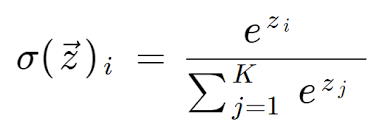

In [39]:
def one_hot(Y):
  #one hot encoding is basically a single array in which every index is zero except that y numbered index
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1

  #transpose the array
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
  one_hot_Y = one_hot(Y)
  # diff in actual and the ouput
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1 
  W2 = W2 - alpha * dW2  
  b2 = b2 - alpha * db2 
  return W1, b1, W2, b2


In [37]:
def get_predictions(A2):
    #argmax returns the index which is the max in the col. so out of all the columns, it will return the index of the max one, 
    # that is label which has the max probability or otherwise prediction
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # for every 10 iterations, show the output 
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [41]:
W1, b1, W1, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 6 2 ... 2 8 2] [5 5 9 ... 4 4 1]
0.10841463414634146
Iteration:  10
[0 6 2 ... 8 8 3] [5 5 9 ... 4 4 1]
0.15314634146341463
Iteration:  20
[2 6 0 ... 8 8 9] [5 5 9 ... 4 4 1]
0.19919512195121952
Iteration:  30
[3 0 0 ... 8 8 9] [5 5 9 ... 4 4 1]
0.265
Iteration:  40
[3 0 2 ... 8 9 1] [5 5 9 ... 4 4 1]
0.3168780487804878
Iteration:  50
[3 0 2 ... 8 9 1] [5 5 9 ... 4 4 1]
0.353390243902439
Iteration:  60
[3 0 8 ... 8 9 1] [5 5 9 ... 4 4 1]
0.38802439024390245
Iteration:  70
[3 0 8 ... 8 9 1] [5 5 9 ... 4 4 1]
0.42797560975609755
Iteration:  80
[3 0 8 ... 8 9 1] [5 5 9 ... 4 4 1]
0.47553658536585364
Iteration:  90
[3 0 8 ... 4 9 1] [5 5 9 ... 4 4 1]
0.519
Iteration:  100
[2 0 8 ... 4 9 1] [5 5 9 ... 4 4 1]
0.5550243902439025
Iteration:  110
[2 0 7 ... 4 9 1] [5 5 9 ... 4 4 1]
0.5845609756097561
Iteration:  120
[2 0 7 ... 4 9 1] [5 5 9 ... 4 4 1]
0.6099268292682927
Iteration:  130
[2 0 7 ... 4 4 1] [5 5 9 ... 4 4 1]
0.6324390243902439
Iteration:  140
[2 0 7 ... 4 4 1] [5 5